In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf

d=pd.read_csv("OneHot_trainingSet copy.csv")
train=pd.DataFrame(d)
dd=pd.read_csv("OneHot_testingSet copy.csv")
test=pd.DataFrame(dd)
train1=train.to_numpy()
test1=test.to_numpy()
#trainXt = tf.convert_to_tensor(trainX, dtype=float, name='trainXt')
#testXt = tf.convert_to_tensor(testX, dtype=float, name='testXt')
print(type(train1))

<class 'numpy.ndarray'>


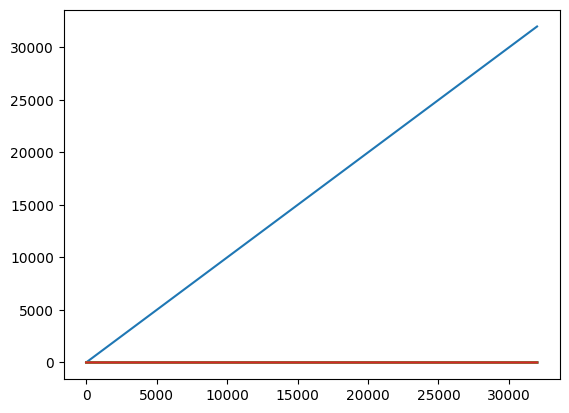

(32000, 24)
x: (32000, 24, 1) y: (32000, 24)
(24, 1)
24
xtrain: (27200, 24, 1) ytrian: (27200, 24)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 24)                1560      
                                                                 
Total params: 18,456
Trainable params: 18,456
Non-trainable params: 0
_________________________________________________________________
150/150 [==============================] - 1s 5ms/step
y1 MSE:2.7144
y2 MSE:47.4529


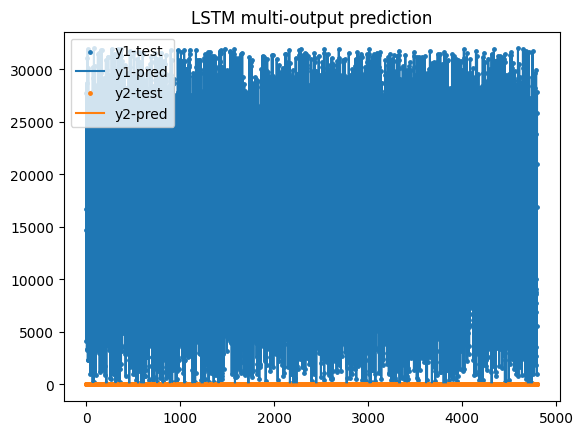

In [ ]:

#x, y = create_data(n=400)
x=train1
y=train1
plt.plot(y)
plt.show()

print(x.shape)

x = x.reshape(x.shape[0], x.shape[1], 1)
print("x:", x.shape, "y:", y.shape)

in_dim = (x.shape[1], x.shape[2])
out_dim = y.shape[1]
print(in_dim)
print(out_dim)

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
print("xtrain:", xtrain.shape, "ytrian:", ytrain.shape)

#fitting the model
model = Sequential()
model.add(LSTM(64, input_shape=in_dim, activation="relu"))
model.add(Dense(out_dim))
model.compile(loss="mse", optimizer="adam")
model.summary()

model.fit(xtrain, ytrain, epochs=100, batch_size=12, verbose=0)

#predicting and visualising
ypred = model.predict(xtest)
print("y1 MSE:%.4f" % mean_squared_error(ytest[:,0], ypred[:,0]))
print("y2 MSE:%.4f" % mean_squared_error(ytest[:,1], ypred[:,1]))

x_ax = range(len(xtest))
plt.title("LSTM multi-output prediction")
plt.scatter(x_ax, ytest[:,0],  s=6, label="y1-test")
plt.plot(x_ax, ypred[:,0], label="y1-pred")
plt.scatter(x_ax, ytest[:,1],  s=6, label="y2-test")
plt.plot(x_ax, ypred[:,1], label="y2-pred")
plt.legend()
plt.show()

In [ ]:
def build_model():
    model = Sequential()

    model.add(LSTM(
        input_shape=(50,3),
        return_sequences=True, units=50))
    model.add(Dropout(0.2))

    model.add(LSTM(
        250,
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(TimeDistributed(Dense(3)))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model